HSV


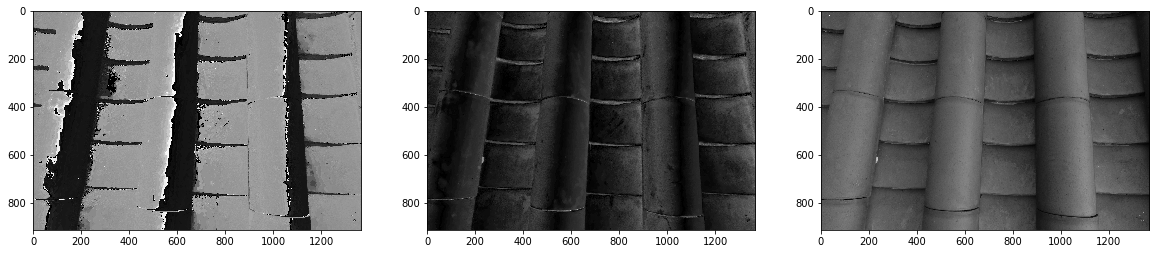

In [8]:
import os
import cv2, cv2_utf8
import numpy as np
from matplotlib import pyplot as plt

def open_images(dir_path):
    for file_basename in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file_basename)
        file_ext = os.path.splitext(file_basename)[-1]
        if not file_ext.lower() in ['.jpg', '.jpeg', '.png']: continue

        frame = cv2_utf8.imread(file_path)
        if frame is not None:
            yield frame

def showImageSplit(color_image):
    fig, axs = plt.subplots(1, 3, figsize=(20,6))
    for ch in range(3):
        axs[ch].imshow(color_image[:,:,ch], cmap='gray')
    plt.show()

dir_path = 'res/tile/'

for frame in open_images(dir_path):
    h,w = frame.shape[:2]
    scaler = 4
    frame_small = cv2.resize(frame, (w//scaler, h//scaler))

    frame_laplacian = cv2.Laplacian(frame_small, cv2.CV_8U, ksize=5)
    frame_laplacian_gray = cv2.cvtColor(frame_laplacian, cv2.COLOR_BGR2GRAY)

    frame_thresh = cv2.threshold(frame_laplacian_gray, 196, 255, cv2.THRESH_BINARY)[-1]
    frame_thresh = cv2.morphologyEx(frame_thresh, cv2.MORPH_OPEN, kernel=(5,5))
    frame_thresh = cv2.morphologyEx(frame_thresh, cv2.MORPH_CLOSE, kernel=(5,5))

    frame_result = cv2.cvtColor(frame_small, cv2.COLOR_BGR2HSV)
    
    print('HSV')
    frame_hsv = cv2.cvtColor(frame_small, cv2.COLOR_BGR2HSV)
    showImageSplit(frame_result)

    print('HSV')
    frame_
    showImageSplit(frame_result)
    break
